In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

In [2]:
# read the data
d=pd.read_csv("AppleNewsStock.csv")

d.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Index,News
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,More on Housing Prices : The broadest governme...
2,05-12-2006,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,2452.38,NaN
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,Honoring R.W. Apple in Words and Food : About ...
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,"Homebuilders, and Worries Over Jobs, Lead a De..."


In [3]:
news=d['News']   
print(news.head())

df=d.iloc[:,d.columns!='News']

# get the names of the columns
df.head()

0    WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1    More on Housing Prices : The broadest governme...
2                                                  NaN
3    Honoring R.W. Apple in Words and Food : About ...
4    Homebuilders, and Worries Over Jobs, Lead a De...
Name: News, dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume,Index
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39
2,05-12-2006,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,2452.38
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69


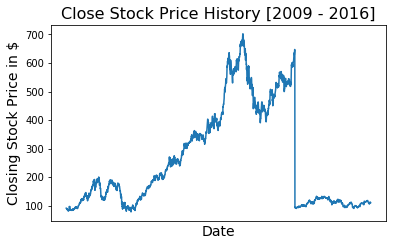

In [4]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2016]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

Text(0.5, 1.0, 'Time Series Plot')

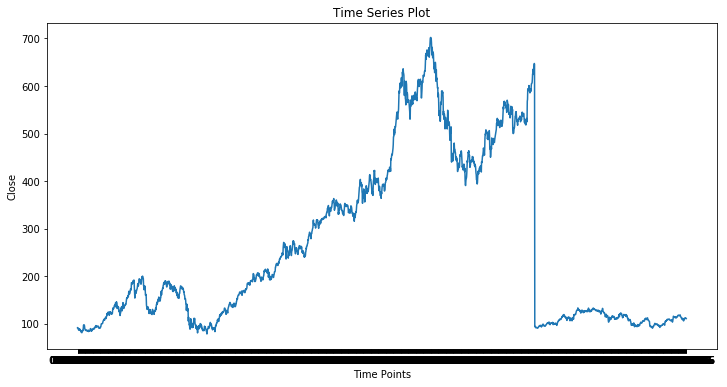

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Time Points')
plt.ylabel('Close')
plt.title('Time Series Plot')

In [6]:
df['HIGH-LOW']=df['High']-df['Low']
df['CLOSEP-OPENP']=df['Close']-df['Open']

Text(0.5, 1.0, 'Histogram of CLOSEP-OPENP')

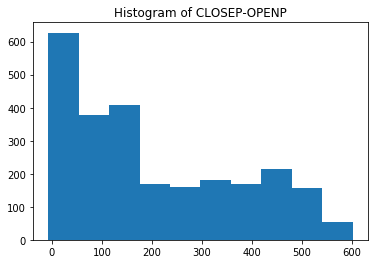

In [7]:
plt.hist(df['CLOSEP-OPENP'])
plt.title('Histogram of CLOSEP-OPENP')

Text(0.5, 1.0, 'Histogram of HIGH-LOW')

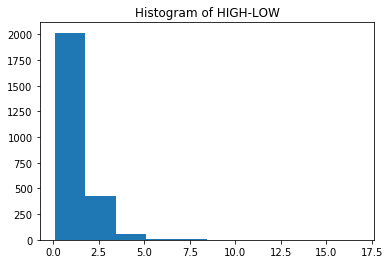

In [8]:
plt.hist(df['HIGH-LOW'])
plt.title('Histogram of HIGH-LOW')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Index,HIGH-LOW,CLOSEP-OPENP
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,0.318572,78.205715
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,0.221428,77.994289
2,05-12-2006,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,2452.38,0.208572,78.177140
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,0.245715,76.881431
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,0.514286,74.178573


In [10]:


df['Close']=df['Close'].astype('float64')

 
df['Y']=df['Close'][1:]/df['Close'][:-1].values-1

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Index,HIGH-LOW,CLOSEP-OPENP,Y
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,0.318572,78.205715,NaN
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,0.221428,77.994289,-0.002190
2,05-12-2006,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,2452.38,0.208572,78.177140,0.001646
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,0.245715,76.881431,-0.015777
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,0.514286,74.178573,-0.031059


In [11]:
df.loc[df['Y']>0, 'DEX']=1
df.loc[df['Y']<=0, 'DEX']=-1

 
df['DEX']=df['DEX'].shift(-1)
df.head()
df.to_csv('senti.csv')

Text(0, 0.5, 'Count')

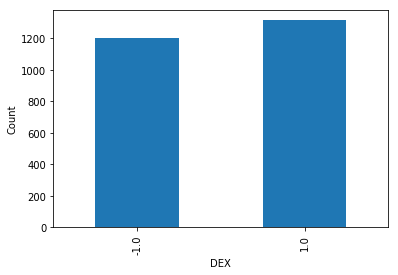

In [12]:
df.groupby(['DEX'])['Close'].count().plot(kind='bar')
plt.ylabel('Count')

In [13]:
# remove the rows with missing values
df=df.dropna()

In [14]:
y=df['DEX']
X=df[['CLOSEP-OPENP', 'HIGH-LOW']]

In [15]:
# set the train set size
pc=.90
j=int(pc*len(df['DEX']))

# train test split of features
X_train=X[:j]
X_test=X[j:]

In [16]:
# train test split of target variable
y_train=y[:j]
y_test=y[j:]
y_test.count

<bound method Series.count of 2264   -1.0
2265   -1.0
2266    1.0
2267   -1.0
2268   -1.0
2269   -1.0
2270    1.0
2271   -1.0
2272   -1.0
2273   -1.0
2274    1.0
2275   -1.0
2276   -1.0
2277    1.0
2278   -1.0
2279    1.0
2280   -1.0
2281   -1.0
2282    1.0
2283   -1.0
2284   -1.0
2285    1.0
2286   -1.0
2287   -1.0
2288   -1.0
2289    1.0
2290    1.0
2291    1.0
2292   -1.0
2293    1.0
       ... 
2486   -1.0
2487   -1.0
2488   -1.0
2489    1.0
2490    1.0
2491   -1.0
2492   -1.0
2493   -1.0
2494   -1.0
2495   -1.0
2496    1.0
2497   -1.0
2498   -1.0
2499    1.0
2500    1.0
2501   -1.0
2502   -1.0
2503    1.0
2504   -1.0
2505    1.0
2506    1.0
2507   -1.0
2508    1.0
2509    1.0
2510    1.0
2511   -1.0
2512    1.0
2513   -1.0
2514   -1.0
2515   -1.0
Name: DEX, Length: 252, dtype: float64>

In [17]:
#Fitting Kernel_SVM Classification Model
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

C:\Users\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
#Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=classifier, X = X_train, y = y_train.ravel(), cv=10)
accuracy.mean()
accuracy.std()
#Predicting the test set results
y_pred = classifier.predict(X_test)
print(y_pred)

C:\Users\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196:

[-1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.
 -1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.
  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.
 -1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.
 -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.
  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.
  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.
 -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1

In [19]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


acc=accuracy_score(y_test,y_pred)
acc

0.46825396825396826

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)


random_forest.fit(X_train,y_train.values.ravel())

y_pred = random_forest.predict(X_test)
print(y_pred)

[ 1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.
 -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.
  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1.
 -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1.
 -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.
  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.
 -1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.
  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1

In [21]:
random_forest.score(X_test,y_test)

rf_acc=random_forest.score(X_test,y_test)
print(rf_acc)

print(classification_report(y_test, y_pred))

0.5277777777777778
              precision    recall  f1-score   support

        -1.0       0.53      0.56      0.54       126
         1.0       0.53      0.50      0.51       126

   micro avg       0.53      0.53      0.53       252
   macro avg       0.53      0.53      0.53       252
weighted avg       0.53      0.53      0.53       252



In [22]:
from sklearn.linear_model import LogisticRegression
import time





#lr.fit(X_train,y_train)

lr =  LogisticRegression()
lr.fit(X_train, y_train)
#
# Calculate the predicted value for training and test dataset
#
#y_train_pred = pipeline.predict(X_train)

y_test_pred = lr.predict(X_test)
print(y_test_pred)

lr.score(X_test,y_test)

lr_acc=lr.score(X_test,y_test)
print(lr_acc)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

cm

C:\Users\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ 1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1

array([[ 11, 115],
       [ 14, 112]], dtype=int64)

In [23]:
import math
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2012

In [24]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02070846],
       [0.02094887],
       [0.01864081],
       ...,
       [0.05383876],
       [0.05348614],
       [0.05330983]])

In [25]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
print(y_train)
print()

[array([0.02070846, 0.02094887, 0.01864081, 0.01416894, 0.01612437,
       0.01690976, 0.0127264 , 0.01739062, 0.01658919, 0.01525886,
       0.01165251, 0.01299888, 0.0105145 , 0.00753327, 0.00641128,
       0.00530535, 0.00532138, 0.00427954, 0.01064273, 0.00897581,
       0.01195704, 0.01097932, 0.01165251, 0.02303254, 0.03013304,
       0.02820966, 0.02631833, 0.03029332, 0.02684725, 0.01742267,
       0.01650906, 0.01376822, 0.01202116, 0.01362399, 0.01290271,
       0.01150825, 0.01240583, 0.01178074, 0.01206924, 0.01048245,
       0.01049848, 0.0092002 , 0.00953678, 0.01274243, 0.01279052,
       0.00812631, 0.01070684, 0.01041835, 0.01138004, 0.01123578,
       0.01062671, 0.01234172, 0.01763103, 0.01812791, 0.01742267,
       0.01652509, 0.00918417, 0.01027409, 0.01420101, 0.01155634])]
[array([0.02070846, 0.02094887, 0.01864081, 0.01416894, 0.01612437,
       0.01690976, 0.0127264 , 0.01739062, 0.01658919, 0.01525886,
       0.01165251, 0.01299888, 0.0105145 , 0.00753327, 0.0

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
#x_train

(1952, 60, 1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


#Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(x_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
61/61 [==============================] - 9s 63ms/step - loss: 0.0281
Epoch 2/30
61/61 [==============================] - 4s 63ms/step - loss: 0.0034
Epoch 3/30
61/61 [==============================] - 4s 62ms/step - loss: 0.0024
Epoch 4/30
61/61 [==============================] - 4s 62ms/step - loss: 0.0021
Epoch 5/30
61/61 [==============================] - 4s 63ms/step - loss: 0.0016
Epoch 6/30
61/61 [==============================] - 4s 62ms/step - loss: 6.5166e-04
Epoch 7/30
61/61 [==============================] - 4s 62ms/step - loss: 0.0015
Epoch 8/30
61/61 [==============================] - 4s 63ms/step - loss: 0.0021
Epoch 9/30
61/61 [==============================] - 4s 62ms/step - loss: 7.8174e-04
Epoch 10/30
61/61 [==============================] - 4s 62ms/step - loss: 0.0013
Epoch 11/30
61/61 [==============================] - 4s 63ms/step - loss: 8.9389e-04
Epoch 12/30
61/61 [==============================] - 4s 62ms/step - loss: 6.5815e-04
Epoch 13/30
61/61 [==

In [31]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  

In [32]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [33]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [34]:
#Get the models predicted price values 
predictions = model.predict(x_test)
print(predictions)
predictions = scaler.inverse_transform(predictions)

[[0.06995646]
 [0.06796686]
 [0.06738415]
 [0.06709741]
 [0.06672165]
 [0.06500356]
 [0.06455909]
 [0.06334658]
 [0.06220309]
 [0.06041976]
 [0.0582784 ]
 [0.05598249]
 [0.05593592]
 [0.05823643]
 [0.05980478]
 [0.06129467]
 [0.0620043 ]
 [0.06196589]
 [0.06285813]
 [0.06360106]
 [0.06326586]
 [0.06159767]
 [0.05962223]
 [0.05655954]
 [0.05433992]
 [0.05393513]
 [0.05641004]
 [0.05878277]
 [0.05876724]
 [0.05872095]
 [0.05842926]
 [0.05650992]
 [0.05441537]
 [0.0545247 ]
 [0.05558103]
 [0.05808654]
 [0.06039008]
 [0.06190418]
 [0.06047545]
 [0.06229233]
 [0.06624208]
 [0.06833211]
 [0.07007875]
 [0.07113004]
 [0.07215592]
 [0.07302567]
 [0.0729787 ]
 [0.0731938 ]
 [0.07471275]
 [0.07763865]
 [0.08076468]
 [0.08317984]
 [0.08499102]
 [0.08651499]
 [0.08725598]
 [0.08815658]
 [0.09080803]
 [0.0924162 ]
 [0.09123158]
 [0.09080711]
 [0.08956254]
 [0.08897173]
 [0.08891648]
 [0.08854087]
 [0.08700221]
 [0.08588175]
 [0.08557987]
 [0.0840506 ]
 [0.08149233]
 [0.08090746]
 [0.08048383]
 [0.08

In [35]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.048106055651321

C:\Users\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


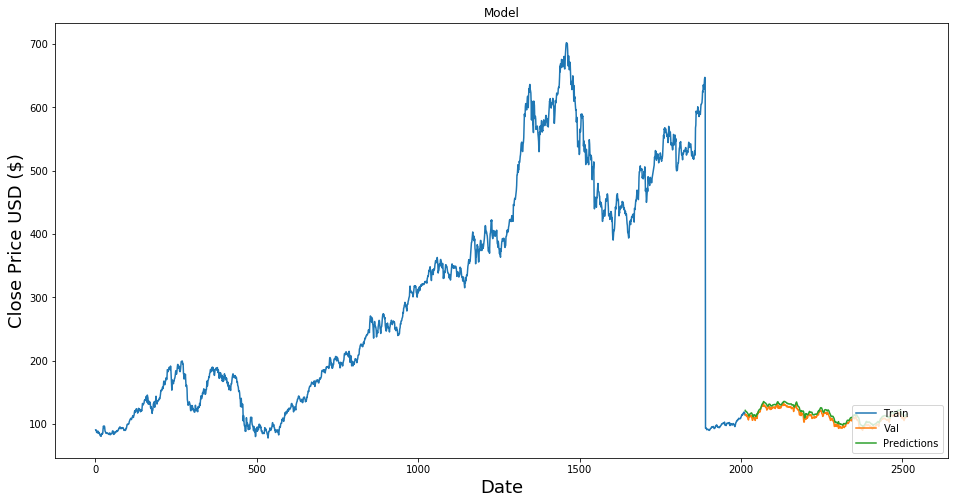

In [36]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:

from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

# read the data
df=pd.read_csv("AppleNewsStock.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Index,News
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,More on Housing Prices : The broadest governme...
2,05-12-2006,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,2452.38,NaN
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,Honoring R.W. Apple in Words and Food : About ...
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,"Homebuilders, and Worries Over Jobs, Lead a De..."


In [38]:
df['Close']=df['Close'].astype('float64')





df['HIGH-LOW']=df['High']-df['Low']
df['CLOSEP-OPENP']=df['Close']-df['Open']

df=df.dropna()
df.head()

# remove the rows with missing values



,Date,Open,High,Low,Close,Adj Close,Volume,Index,News,HIGH-LOW,CLOSEP-OPENP
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,0.318572,78.205715
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,More on Housing Prices : The broadest governme...,0.221428,77.994289
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,Honoring R.W. Apple in Words and Food : About ...,0.245715,76.881431
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,"Homebuilders, and Worries Over Jobs, Lead a De...",0.514286,74.178573
5,08-12-2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,2437.36,"Homebuilders, and Worries Over Jobs, Lead a De...",0.341428,75.798566


In [39]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
#from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import numpy as np
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import re 
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)#sub(characters we want to keep, removed character replaced by space, string to work on)
        
    return input_txt

df['NewNews'] = np.vectorize(remove_pattern)(df['News'], "@[\w]*")

import string
df['NewNews'] = df['NewNews'].str.replace("[^a-zA-Z#]", " ")

df['NewNews'] = df['NewNews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3 ])) #tokenization

df.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Index,News,HIGH-LOW,CLOSEP-OPENP,NewNews
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,0.318572,78.205715,WHAT TONIGHT ASHLEY JUDD YOUTHAIDS CONFRONTING...
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,More on Housing Prices : The broadest governme...,0.221428,77.994289,More Housing Prices broadest government measur...
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,Honoring R.W. Apple in Words and Food : About ...,0.245715,76.881431,Honoring Apple Words Food About Apple admirers...
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,"Homebuilders, and Worries Over Jobs, Lead a De...",0.514286,74.178573,Homebuilders Worries Over Jobs Lead Decline St...
5,08-12-2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,2437.36,"Homebuilders, and Worries Over Jobs, Lead a De...",0.341428,75.798566,Homebuilders Worries Over Jobs Lead Decline St...


In [40]:
tokenized = df['NewNews'].apply(lambda x: x.split())

import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized = tokenized.apply(lambda x : [stemmer.stem(i) for i in x])
tokenized.head()

all_words = ' '.join([text for text in df['NewNews']])

# visualizing which of the word is most commonly used in the twitter dataset



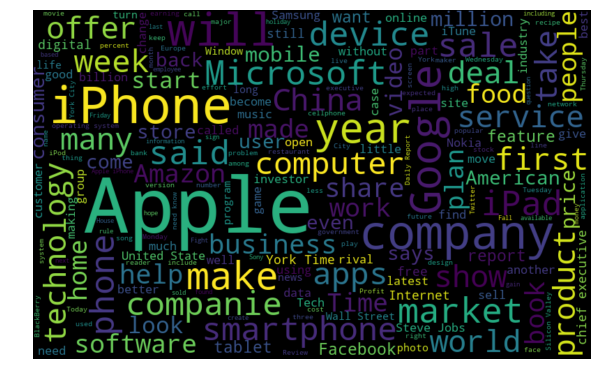

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['NewNews'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



In [42]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['NewNews'].apply(getSubjectivity)
df['Polarity'] = df['NewNews'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df



,Date,Open,High,Low,Close,Adj Close,Volume,Index,News,HIGH-LOW,CLOSEP-OPENP,NewNews,Subjectivity,Polarity
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,0.318572,78.205715,WHAT TONIGHT ASHLEY JUDD YOUTHAIDS CONFRONTING...,0.379558,-0.049796
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,More on Housing Prices : The broadest governme...,0.221428,77.994289,More Housing Prices broadest government measur...,0.342500,0.170000
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,Honoring R.W. Apple in Words and Food : About ...,0.245715,76.881431,Honoring Apple Words Food About Apple admirers...,0.515476,0.078571
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,"Homebuilders, and Worries Over Jobs, Lead a De...",0.514286,74.178573,Homebuilders Worries Over Jobs Lead Decline St...,0.234286,-0.055714
5,08-12-2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,2437.36,"Homebuilders, and Worries Over Jobs, Lead a De...",0.341428,75.798566,Homebuilders Worries Over Jobs Lead Decline St...,0.226667,0.056667
6,11-12-2006,12.700000,12.757143,12.578571,88.750000,12.678572,124945100,2442.86,Sales of iPods and iTunes Not Much in Sync : T...,0.178572,76.050000,Sales iPods iTunes Much Sync numbers suggest t...,0.292500,0.121250
8,13-12-2006,12.564285,12.724286,12.450000,89.050003,12.721429,214263000,2432.41,Op-Art; iDentities : Op-Art by Seymour Chwast ...,0.274286,76.485718,iDentities Seymour Chwast portrays imaginative...,0.482870,0.197222
9,14-12-2006,12.721429,12.857142,12.608571,88.549995,12.650000,208082700,2453.85,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...",0.248571,75.828566,Adam Madam Kristin Chenoweth uses every theatr...,0.455952,0.137218
10,15-12-2006,12.717143,12.745714,12.475715,87.720001,12.531428,184984800,2457.20,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...",0.269999,75.002858,Adam Madam Kristin Chenoweth uses every theatr...,0.294410,0.037992
11,18-12-2006,12.518572,12.571428,12.084286,85.470001,12.210000,180394200,2435.57,Apple Delays Earnings Statement Due to Options...,0.487142,72.951429,Apple Delays Earnings Statement Options Grants...,0.093750,-0.031250


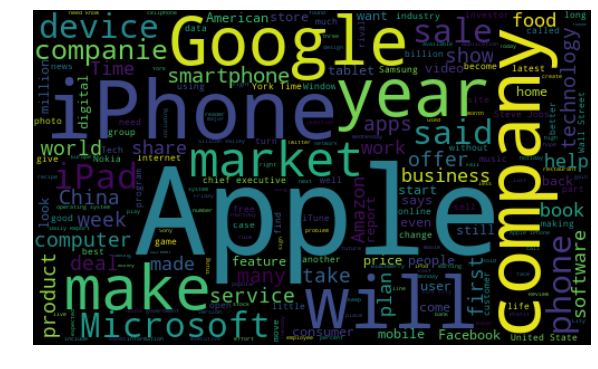

,Date,Open,High,Low,Close,Adj Close,Volume,Index,News,HIGH-LOW,CLOSEP-OPENP,NewNews,Subjectivity,Polarity,Analysis
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,0.318572,78.205715,WHAT TONIGHT ASHLEY JUDD YOUTHAIDS CONFRONTING...,0.379558,-0.049796,Negative
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,More on Housing Prices : The broadest governme...,0.221428,77.994289,More Housing Prices broadest government measur...,0.342500,0.170000,Positive
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,Honoring R.W. Apple in Words and Food : About ...,0.245715,76.881431,Honoring Apple Words Food About Apple admirers...,0.515476,0.078571,Positive
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,"Homebuilders, and Worries Over Jobs, Lead a De...",0.514286,74.178573,Homebuilders Worries Over Jobs Lead Decline St...,0.234286,-0.055714,Negative
5,08-12-2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,2437.36,"Homebuilders, and Worries Over Jobs, Lead a De...",0.341428,75.798566,Homebuilders Worries Over Jobs Lead Decline St...,0.226667,0.056667,Positive
6,11-12-2006,12.700000,12.757143,12.578571,88.750000,12.678572,124945100,2442.86,Sales of iPods and iTunes Not Much in Sync : T...,0.178572,76.050000,Sales iPods iTunes Much Sync numbers suggest t...,0.292500,0.121250,Positive
8,13-12-2006,12.564285,12.724286,12.450000,89.050003,12.721429,214263000,2432.41,Op-Art; iDentities : Op-Art by Seymour Chwast ...,0.274286,76.485718,iDentities Seymour Chwast portrays imaginative...,0.482870,0.197222,Positive
9,14-12-2006,12.721429,12.857142,12.608571,88.549995,12.650000,208082700,2453.85,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...",0.248571,75.828566,Adam Madam Kristin Chenoweth uses every theatr...,0.455952,0.137218,Positive
10,15-12-2006,12.717143,12.745714,12.475715,87.720001,12.531428,184984800,2457.20,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...",0.269999,75.002858,Adam Madam Kristin Chenoweth uses every theatr...,0.294410,0.037992,Positive
11,18-12-2006,12.518572,12.571428,12.084286,85.470001,12.210000,180394200,2435.57,Apple Delays Earnings Statement Due to Options...,0.487142,72.951429,Apple Delays Earnings Statement Options Grants...,0.093750,-0.031250,Negative


In [43]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['NewNews']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return('Negative')
    elif score == 0:
        return( 'Neutral')
    else:
        return ('Positive')
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df



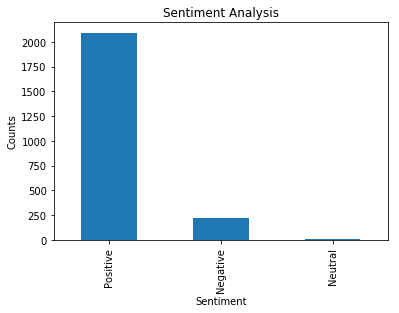

In [44]:
# Show the value counts
df['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()



In [45]:
#df = df.drop(['Date','Open','High','Low','Close','Adj Close','Volume','Index','News'],axis=1)

df = df.drop(['HIGH-LOW','CLOSEP-OPENP'],axis=1)

df


,Date,Open,High,Low,Close,Adj Close,Volume,Index,News,NewNews,Subjectivity,Polarity,Analysis
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,WHAT TONIGHT ASHLEY JUDD YOUTHAIDS CONFRONTING...,0.379558,-0.049796,Negative
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,More on Housing Prices : The broadest governme...,More Housing Prices broadest government measur...,0.342500,0.170000,Positive
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,Honoring R.W. Apple in Words and Food : About ...,Honoring Apple Words Food About Apple admirers...,0.515476,0.078571,Positive
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,"Homebuilders, and Worries Over Jobs, Lead a De...",Homebuilders Worries Over Jobs Lead Decline St...,0.234286,-0.055714,Negative
5,08-12-2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,2437.36,"Homebuilders, and Worries Over Jobs, Lead a De...",Homebuilders Worries Over Jobs Lead Decline St...,0.226667,0.056667,Positive
6,11-12-2006,12.700000,12.757143,12.578571,88.750000,12.678572,124945100,2442.86,Sales of iPods and iTunes Not Much in Sync : T...,Sales iPods iTunes Much Sync numbers suggest t...,0.292500,0.121250,Positive
8,13-12-2006,12.564285,12.724286,12.450000,89.050003,12.721429,214263000,2432.41,Op-Art; iDentities : Op-Art by Seymour Chwast ...,iDentities Seymour Chwast portrays imaginative...,0.482870,0.197222,Positive
9,14-12-2006,12.721429,12.857142,12.608571,88.549995,12.650000,208082700,2453.85,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...",Adam Madam Kristin Chenoweth uses every theatr...,0.455952,0.137218,Positive
10,15-12-2006,12.717143,12.745714,12.475715,87.720001,12.531428,184984800,2457.20,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...",Adam Madam Kristin Chenoweth uses every theatr...,0.294410,0.037992,Positive
11,18-12-2006,12.518572,12.571428,12.084286,85.470001,12.210000,180394200,2435.57,Apple Delays Earnings Statement Due to Options...,Apple Delays Earnings Statement Options Grants...,0.093750,-0.031250,Negative


In [46]:
from sklearn.preprocessing import LabelEncoder 

lab=LabelEncoder()

df['Analysis']=lab.fit_transform(df['Analysis'])

df



,Date,Open,High,Low,Close,Adj Close,Volume,Index,News,NewNews,Subjectivity,Polarity,Analysis
0,01-12-2006,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,2413.21,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,WHAT TONIGHT ASHLEY JUDD YOUTHAIDS CONFRONTING...,0.379558,-0.049796,0
1,04-12-2006,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,2448.39,More on Housing Prices : The broadest governme...,More Housing Prices broadest government measur...,0.342500,0.170000,2
3,06-12-2006,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,2445.86,Honoring R.W. Apple in Words and Food : About ...,Honoring Apple Words Food About Apple admirers...,0.515476,0.078571,2
4,07-12-2006,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,2427.69,"Homebuilders, and Worries Over Jobs, Lead a De...",Homebuilders Worries Over Jobs Lead Decline St...,0.234286,-0.055714,0
5,08-12-2006,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,2437.36,"Homebuilders, and Worries Over Jobs, Lead a De...",Homebuilders Worries Over Jobs Lead Decline St...,0.226667,0.056667,2
6,11-12-2006,12.700000,12.757143,12.578571,88.750000,12.678572,124945100,2442.86,Sales of iPods and iTunes Not Much in Sync : T...,Sales iPods iTunes Much Sync numbers suggest t...,0.292500,0.121250,2
8,13-12-2006,12.564285,12.724286,12.450000,89.050003,12.721429,214263000,2432.41,Op-Art; iDentities : Op-Art by Seymour Chwast ...,iDentities Seymour Chwast portrays imaginative...,0.482870,0.197222,2
9,14-12-2006,12.721429,12.857142,12.608571,88.549995,12.650000,208082700,2453.85,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...",Adam Madam Kristin Chenoweth uses every theatr...,0.455952,0.137218,2
10,15-12-2006,12.717143,12.745714,12.475715,87.720001,12.531428,184984800,2457.20,"Adam, She’s Ms. Madam : Kristin Chenoweth uses...",Adam Madam Kristin Chenoweth uses every theatr...,0.294410,0.037992,2
11,18-12-2006,12.518572,12.571428,12.084286,85.470001,12.210000,180394200,2435.57,Apple Delays Earnings Statement Due to Options...,Apple Delays Earnings Statement Options Grants...,0.093750,-0.031250,0


In [47]:
df['Analysis'].value_counts()

2    2092
0     220
1      11
Name: Analysis, dtype: int64

In [48]:
y=df['Analysis']
X=df[['NewNews']]

X

,NewNews
0,WHAT TONIGHT ASHLEY JUDD YOUTHAIDS CONFRONTING...
1,More Housing Prices broadest government measur...
3,Honoring Apple Words Food About Apple admirers...
4,Homebuilders Worries Over Jobs Lead Decline St...
5,Homebuilders Worries Over Jobs Lead Decline St...
6,Sales iPods iTunes Much Sync numbers suggest t...
8,iDentities Seymour Chwast portrays imaginative...
9,Adam Madam Kristin Chenoweth uses every theatr...
10,Adam Madam Kristin Chenoweth uses every theatr...
11,Apple Delays Earnings Statement Options Grants...


In [49]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(df['NewNews'], y, test_size=0.33, random_state=53)



tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [50]:
classifier = LinearSVC()


classifier.fit(tfidf_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = classifier.predict(tfidf_test)
print(y_pred)
cm=confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

print(f'\nClassification Report:\n{classification_report(y_test,y_pred)}')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
pos= 2092 
neg = 219 
pos1= 1215
neg1= 1107 
predic_value= 4633

predic_avg=predic_value/2

predic_avg


2316.5

In [54]:
if pos>neg and pos1>neg1 and predic_avg>2000 and predic_avg>4000:
    print("stock price will increase")
elif pos>neg and pos1>neg1 and predic_avg>2000:
    print("stock price will stagnant")
else:
    print("Stock price will decrease")

stock price will stagnant
